FOR ORAL CANCER PREDICTION


In [2]:
!git clone https://github.com/RiyaHablani/Oral_Cancer_Detection.git

Cloning into 'Oral_Cancer_Detection'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 143 (delta 11), reused 120 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 26.74 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
import glob
import numpy as np
from PIL import Image
from numpy import array
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
import keras as k
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
import joblib
import warnings
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import joblib
warnings.filterwarnings("ignore")

In [5]:
cancer_imgs = glob.glob('/content/Oral_Cancer_Detection/Dataset/OralCancer/cancer' + '/*.jpg')
non_cancer_imgs = glob.glob('/content/Oral_Cancer_Detection/Dataset/OralCancer/non-cancer/' + '/*.jpg')

In [6]:
dataset = []
labels = []

for img in cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(1)

for img in non_cancer_imgs:
  dataset.append(image.img_to_array(image.load_img(img, target_size=(64, 64))))
  labels.append(0)

dataset = array(dataset)

In [7]:
def evaluate_model(clf, X_test, y_test, model_name):
  print('--------------------------------------------')
  print('Model ', model_name)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred.round(), average='weighted')
  recall = recall_score(y_test, y_pred.round(), average='weighted')
  precision = precision_score(y_test, y_pred.round(), average='weighted')
 # print(classification_report(y_test, y_pred.round()))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)

Cancer Images: 


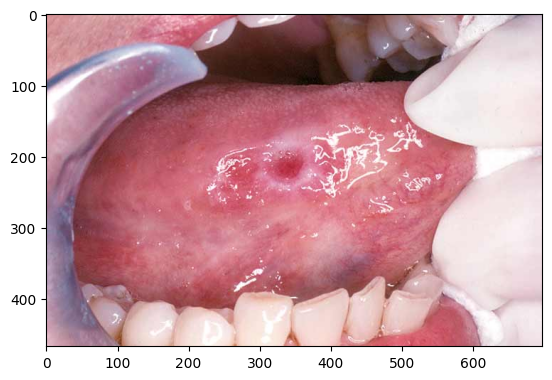

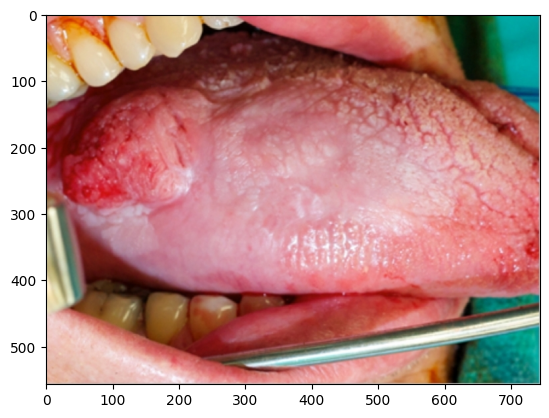

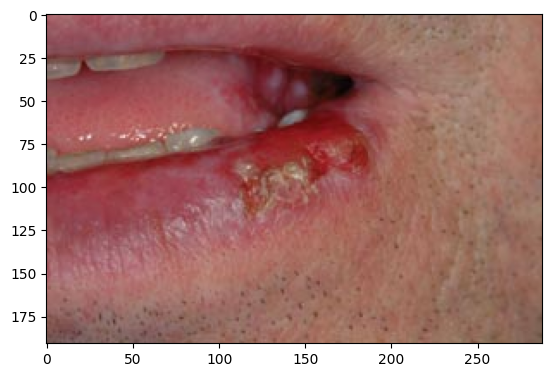

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


print('Cancer Images: ')
for img in cancer_imgs[:3]:
  testim = mpimg.imread(img)
  plt.figure()
  imshow(testim)

In [10]:
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 10

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)

    # Train the Decision Tree model
    dt_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = dt_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(dt_model,"/content/Oral_Cancer_Detection/Models/oc_dt_model")

Average Accuracy: 0.7100

Average Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.86      0.75         7

    accuracy                           0.60        10
   macro avg       0.33      0.43      0.38        10
weighted avg       0.47      0.60      0.53        10

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.67      1.00      0.80         6

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg     

['/content/Oral_Cancer_Detection/Models/oc_dt_model']

In [12]:

from sklearn.ensemble import RandomForestClassifier
# Convert the list to a NumPy array
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 10

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest model
    rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(rf_model,"/content/Oral_Cancer_Detection/Models/oc_rf_model")

Average Accuracy: 0.7400

Average Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.62      0.71      0.67         7

    accuracy                           0.50        10
   macro avg       0.31      0.36      0.33        10
weighted avg       0.44      0.50      0.47        10

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg     

['/content/Oral_Cancer_Detection/Models/oc_rf_model']

In [13]:
# Convert the list to a NumPy array
dataset = np.array(dataset)
labels = np.array(labels)

# Number of folds for cross-validation
num_folds = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
classification_reports = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(dataset):
    # Split the dataset into training and testing sets
    X_train, X_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize SVM model
    svm_model = SVC(kernel='linear', C=1.0)

    # Train the SVM model
    svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracy_scores.append(accuracy)

# Print average accuracy and classification report across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print("\nAverage Classification Report:")
print("\n".join(classification_reports))
joblib.dump(svm_model,"/content/Oral_Cancer_Detection/Models/oc_svm_model")

Average Accuracy: 0.6800

Average Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.89      0.62      0.73        13

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.69      0.75      0.72        12

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20

              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.82      0.64      0.72        14

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.63        20
weighted avg     

['/content/Oral_Cancer_Detection/Models/oc_svm_model']

In [14]:

def load_and_convert_to_gray(img_path):
    img = Image.open(img_path).convert('L')  # 'L' mode stands for grayscale
    img_array = image.img_to_array(img.resize((64, 64)))  # Resize to desired dimensions
    return img_array

dataset = []
labels = []


for img in cancer_imgs:
    img_array = load_and_convert_to_gray(img)
    dataset.append(img_array)
    labels.append(1)

for img in non_cancer_imgs:
    img_array = load_and_convert_to_gray(img)
    dataset.append(img_array)
    labels.append(0)

dataset = array(dataset)
labels = np.array(labels)
labels_one_hot = to_categorical(labels, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(dataset, labels_one_hot, test_size=0.3, random_state=42)

time_steps = X_train.shape[1]
features = X_train.shape[2]

lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(time_steps, features), activation='relu', return_sequences=True))
lstm_model.add(LSTM(16, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_lstm:.4f}, Test Accuracy: {accuracy_lstm:.4f}')

evaluate_model(lstm_model, X_test, y_test, "LSTM")


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.6314 - loss: 115.7905 - val_accuracy: 0.5333 - val_loss: 343.7464
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4830 - loss: 139.2822 - val_accuracy: 0.5333 - val_loss: 86.3059
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4954 - loss: 126.9303 - val_accuracy: 0.6667 - val_loss: 42.3439
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5338 - loss: 206.3828 - val_accuracy: 0.5667 - val_loss: 48.2862
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5455 - loss: 84.4449 - val_accuracy: 0.5000 - val_loss: 60.6795
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4896 - loss: 237.4468 - val_accuracy: 0.5667 - val_loss: 62.0441
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5260 - loss: 71.4976 - val_accuracy: 0.4333 - val_loss: 178.2503
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5481 - loss: 75.4360 - val_accuracy: 0.5

In [15]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [16]:
train_generator = train_datagen.flow_from_directory(
    '/content/Oral_Cancer_Detection/Dataset/OralCancer/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 92 images belonging to 2 classes.


In [17]:
test_generator = train_datagen.flow_from_directory(
     '/content/Oral_Cancer_Detection/Dataset/OralCancer/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'

  )

Found 39 images belonging to 2 classes.


Found 131 files belonging to 2 classes.


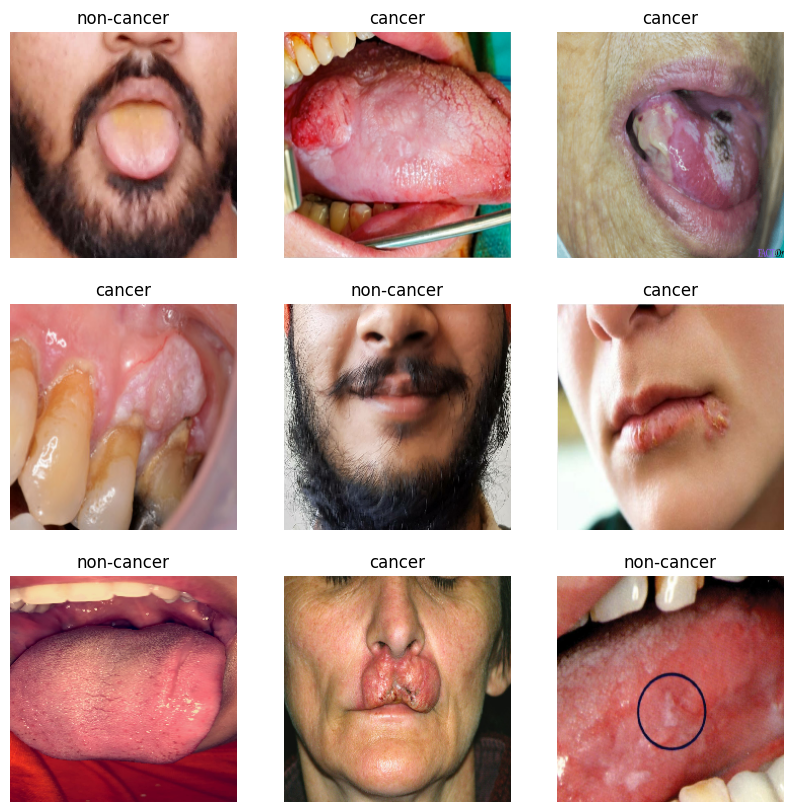

In [18]:
train_dataset = image_dataset_from_directory('/content/Oral_Cancer_Detection/Dataset/OralCancer/',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [19]:
res_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=k.Input(shape=(224,224,3)),
)
for models in res_model.layers[:-1]:
      models.trainable= False
model = k.models.Sequential()
model.add(res_model)
model.add(k.layers.Flatten())
model.add(k.layers.Dense(4, activation='softmax'))
print(model.summary())

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │         401,412 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [20]:
model.compile(optimizer="adam", loss=k.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [21]:
FIT =model.fit(train_generator,
    validation_data = test_generator,
    callbacks = [early],
    epochs = 5)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 12s/step - accuracy: 0.2264 - loss: 1.7621 - val_accuracy: 0.6667 - val_loss: 2.1620
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.6596 - loss: 2.6251 - val_accuracy: 0.6667 - val_loss: 1.1683
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.4932 - loss: 1.9494 - val_accuracy: 0.6667 - val_loss: 0.6209
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 11s/step - accuracy: 0.6637 - loss: 1.2561 - val_accuracy: 0.6667 - val_loss: 1.8302
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step - accuracy: 0.7237 - loss: 1.0223 - val_accuracy: 0.3333 - val_loss: 2.1947


In [22]:
class_name = {0:"cancer",1:"non cancer"}

In [23]:
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step


In [24]:
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)

    if i == test_generator.samples // 32 + 1:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [25]:
f1 = f1_score(y_pred, y_true, average='weighted')
precision = precision_score(y_pred, y_true, average='weighted')
print("F1 Score ", f1)
print("Precision ", precision)

F1 Score  0.8
Precision  1.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# ... other imports ...
from tensorflow.keras.optimizers import Adam

# ... (rest of the code) ...

# Compile the model, using learning_rate instead of lr
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ... (rest of the code) ...
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

f1 = f1_score(y_pred, y_true, average='weighted')
precision = precision_score(y_pred, y_true, average='weighted')
recall=recall_score(y_pred, y_true, average='weighted')
accuracy = accuracy_score(y_pred,y_true)
print("F1 Score ", f1)
print("Precision ", precision)
print("Recall score",recall)
print("Accuracy",accuracy)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.6253 - loss: 0.7783 - val_accuracy: 0.6667 - val_loss: 0.8003
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6972 - loss: 0.6218 - val_accuracy: 0.6923 - val_loss: 0.5864
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.7330 - loss: 0.5635 - val_accuracy: 0.6667 - val_loss: 0.6543
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6900 - loss: 0.5583 - val_accuracy: 0.6667 - val_loss: 0.6334
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.7913 - loss: 0.4378 - val_accuracy: 0.6410 - val_loss: 0.6463
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.7500 - loss: 0.4731 - val_accuracy: 0.6154 - val_loss: 0.6482
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7637 - loss: 0.4369 - val_accuracy: 0.6154 - val_loss: 0.6787
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6632 - loss: 0.6223
Test Loss: 0.6194, Test Accuracy: 0.6667


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step
F1 Score  0.7953296703296703
Precision  0.9763313609467457
Recall score 0.6923076923076923
Accuracy 0.6923076923076923


In [29]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Assuming 'train_generator' is used for training and 'test_generator' for testing
# Assuming you have determined 'num_classes' based on your data
num_classes = 2

# Build the EfficientNetB3 model
efficientnet_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in efficientnet_model.layers:
    layer.trainable = False

# Build your model on top of EfficientNetB3
model = Sequential()
model.add(efficientnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Replace 'lr' with 'learning_rate' when initializing the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)



Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 15s/step - accuracy: 0.4433 - loss: 0.8676 - val_accuracy: 0.6667 - val_loss: 0.6473
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.6631 - loss: 0.7006 - val_accuracy: 0.6667 - val_loss: 0.7989
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 10s/step - accuracy: 0.6726 - loss: 0.7543 - val_accuracy: 0.6667 - val_loss: 0.6724
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.6107 - loss: 0.7536 - val_accuracy: 0.6667 - val_loss: 0.6560
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.6636 - loss: 0.6684 - val_accuracy: 0.6667 - val_loss: 0.6755
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.6870 - loss: 0.6722 - val_accuracy: 0.6667 - val_loss: 0.6388
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 10s/step - accuracy: 0.6500 - loss: 0.6455 - val_accuracy: 0.6667 - val_loss: 0.6392
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 10s/step - accuracy: 0.6305 - loss: 0.6685 - val_accuracy: 0.6667 - val_loss: 0.6497
Epoc

In [31]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Assuming 'train_generator' is used for training and 'test_generator' for testing
# Assuming you have determined 'num_classes' based on your data
num_classes = 2

# Build the VGG19 model
vgg19_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in vgg19_model.layers:
    layer.trainable = False

# Build your model on top of VGG19
model = Sequential()
model.add(vgg19_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model, using learning_rate instead of lr
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Print classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 117s 44s/step - accuracy: 0.3468 - loss: 0.9357 - val_accuracy: 0.7179 - val_loss: 0.6576
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 112s 45s/step - accuracy: 0.7269 - loss: 0.6438 - val_accuracy: 0.6667 - val_loss: 0.6175
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 113s 45s/step - accuracy: 0.6589 - loss: 0.6403 - val_accuracy: 0.6667 - val_loss: 0.6400
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 146s 42s/step - accuracy: 0.6547 - loss: 0.6828 - val_accuracy: 0.6667 - val_loss: 0.6597
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 106s 40s/step - accuracy: 0.6401 - loss: 0.6868 - val_accuracy: 0.6667 - val_loss: 0.6230
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 113s 43s/step - accuracy: 0.6628 - loss: 0.6277 - val_accuracy: 0.6667 - val_loss: 0.6017
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 110s 42s/step - accuracy: 0.6714 - loss: 0.6039 - val_accuracy: 0.6667 - val_loss: 0.6069
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 105s 39s/step - accuracy: 0.6425 - loss: 0.6246 - val_accuracy: 0.6667 - val_loss:

In [32]:
!pip install joblib

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
import numpy as np # Importing numpy

# Reshape X_train to have 2 dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Convert y_train to a 1D array using argmax
y_train_1d = np.argmax(y_train, axis=1) # Converting to 1D array

# Initialize and Train the SVM model
oc_svm_model = SVC()  # Create an instance of the SVC model
oc_svm_model.fit(X_train_reshaped, y_train_1d)  # Using the 1D target array

# Save the models to .pkl files
joblib.dump(oc_dt_model, '/content/Oral_Cancer_Detection/Models/oc_dt_model.pkl')
joblib.dump(oc_rf_model, '/content/Oral_Cancer_Detection/Models/oc_rf_model.pkl')
joblib.dump(oc_svm_model, '/content/Oral_Cancer_Detection/Models/oc_svm_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [48]:
import joblib

# Load the models
oc_dt_model = joblib.load('/content/Oral_Cancer_Detection/Models/oc_dt_model.pkl')
oc_rf_model = joblib.load('/content/Oral_Cancer_Detection/Models/oc_rf_model.pkl')
oc_svm_model = joblib.load('/content/Oral_Cancer_Detection/Models/oc_svm_model.pkl')

# Now you can use these models for prediction